In [1]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


from tqdm import tqdm
from spellchecker import SpellChecker

In [2]:
from PIL import Image

import cv2

In [3]:
image = Image.open('./images/img6.png')
image = cv2.imread('./images/img6.png')
image = image[..., ::-1]

In [4]:
ocr_agent = lp.TesseractAgent(languages='por')

res = ocr_agent.detect(image, return_response=True)
layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.LINE)

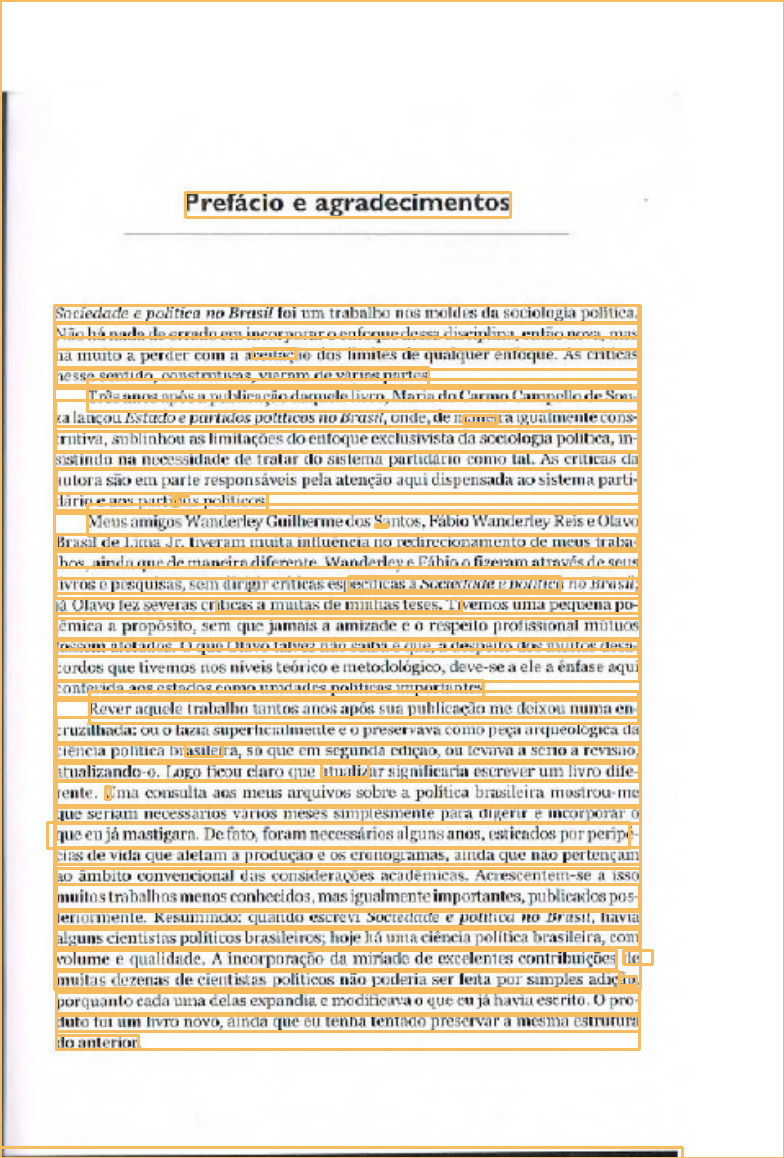

In [5]:
lp.draw_box(image, layout)

In [6]:
dl = layout.to_dataframe()

In [7]:
dl

,x_1,y_1,x_2,y_2,block_type,text,id,score
0,0,0,784,1158,rectangle,,0,-1.000000
1,185,192,510,217,rectangle,,1,-1.000000
2,185,192,510,217,rectangle,,2,-1.000000
3,185,192,510,217,rectangle,Prefácio e agradecimentos,3,71.750000
4,54,305,640,989,rectangle,,4,-1.000000
...,...,...,...,...,...,...,...,...
81,56,1013,639,1031,rectangle,"duto foi um livro novo, ainda que cu tenha te...",81,84.333333
82,56,1035,138,1049,rectangle,do anterior.,82,59.000000
83,0,1147,682,1158,rectangle,,83,-1.000000
84,0,1147,682,1158,rectangle,,84,-1.000000


In [8]:
import re
dl['c_text'] = dl.text.apply(lambda x: x.strip())
text = '\n'.join(dl.c_text)
text = re.sub('\n\n+','\n\n',text).strip()

In [9]:
from os import listdir

In [10]:
def extract_text(image):
    ocr_agent = lp.TesseractAgent(languages='por')

    res = ocr_agent.detect(image, return_response=True)
    layout = ocr_agent.gather_data(res, agg_level=lp.TesseractFeatureType.LINE)
    
    dl = layout.to_dataframe()
    dl['c_text'] = dl.text.apply(lambda x: x.strip())
    text = '\n'.join(dl.c_text)
    text = re.sub('\n\n+','\n\n',text).strip()
    return text


In [11]:
imagespath = ['./images/' + i for i in listdir('./images/')]
pages = []
error_page = []
for path in tqdm(imagespath):
    try:
        image = cv2.imread(path)
        image = image[..., ::-1]
        pages.append(extract_text(image))
    except:
        error_page.append(path)

100%|███████████████████████████████████████████████████████| 371/371 [36:30<00:00,  5.91s/it]


In [56]:
paths =  imagespath.copy()

paths.remove('./images/.ipynb_checkpoints')
pagenum = [int(re.findall('[0-9]+',i)[0]) for i in  paths]

# np.argsort(pagenum)
pages_sorted = np.array(pages)[np.argsort(pagenum)]

## Corrigindo Texto e Retirando Redundâncias

In [75]:
from spellchecker import SpellChecker

In [128]:
pt = SpellChecker(language='pt')
def correct_word(word):
    if not(word.isalpha()):
        return word
    
    corr = pt.correction(word)
    if corr is None:
        return word
    elif word.isupper():
        return corr.upper()
    elif word.istitle():
        return corr.title()
    return corr

In [79]:
pages_sorted =  list(pages_sorted)

In [116]:
fulltext = '\n\n'.join(pages_sorted[1:])

In [ ]:
corrected_text = ''
for line in tqdm(fulltext.split('\n')):
    for word in line.split(' '):
        cw = correct_word(word)
        corrected_text = corrected_text + ' ' + cw
    corrected_text = corrected_text + '\n'

  1%|▍                                                  | 138/18272 [00:26<1:26:27,  3.50it/s]

In [ ]:
corrected_text = corrected_text.strip()

## Salvando

In [70]:
# markdown = '\n\n'.join(pages_sorted)

In [ ]:
#open text file
mark = open("./livro_spelling.md", "w")
 
#write string to file
mark.write(corrected_text)
 
#close file
mark.close()